# Investigation

The API homepage lets you download CSVs of historical forecast and actual CI. These are (presumably) the final forecast values for the given time window. Here I check the forecast error.

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scrape.files import get_data_files
from scrape.graph import _ftime

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 250

# Get data files 2022-23
files = get_data_files("data/samples", extension=".csv")

df = pd.concat([pd.read_csv(fp, index_col=0) for fp in sorted(files)])

# Drop duplicates from overlapping dates
df = df[~df.index.duplicated(keep="last")]

df.index = pd.to_datetime(df.index)

In [2]:
df["error"] = df["Forecast Carbon Intensity (gCO2/kWh)"].sub(df["Actual Carbon Intensity (gCO2/kWh)"])
df["percentage error"] = 100. * df["error"].div(df["Actual Carbon Intensity (gCO2/kWh)"])
df.head()

,Actual Carbon Intensity (gCO2/kWh),Forecast Carbon Intensity (gCO2/kWh),Index,error,percentage error
Datetime (UTC),,,,,
2022-01-01 00:00:00+00:00,71.0,83,low,12.0,16.901408
2022-01-01 00:30:00+00:00,74.0,74,low,0.0,0.000000
2022-01-01 01:00:00+00:00,75.0,70,low,-5.0,-6.666667
2022-01-01 01:30:00+00:00,73.0,70,low,-3.0,-4.109589
2022-01-01 02:00:00+00:00,68.0,61,low,-7.0,-10.294118


Text(0.5, 0.98, 'Percentage national forecast error, 21417 half-hour windows')

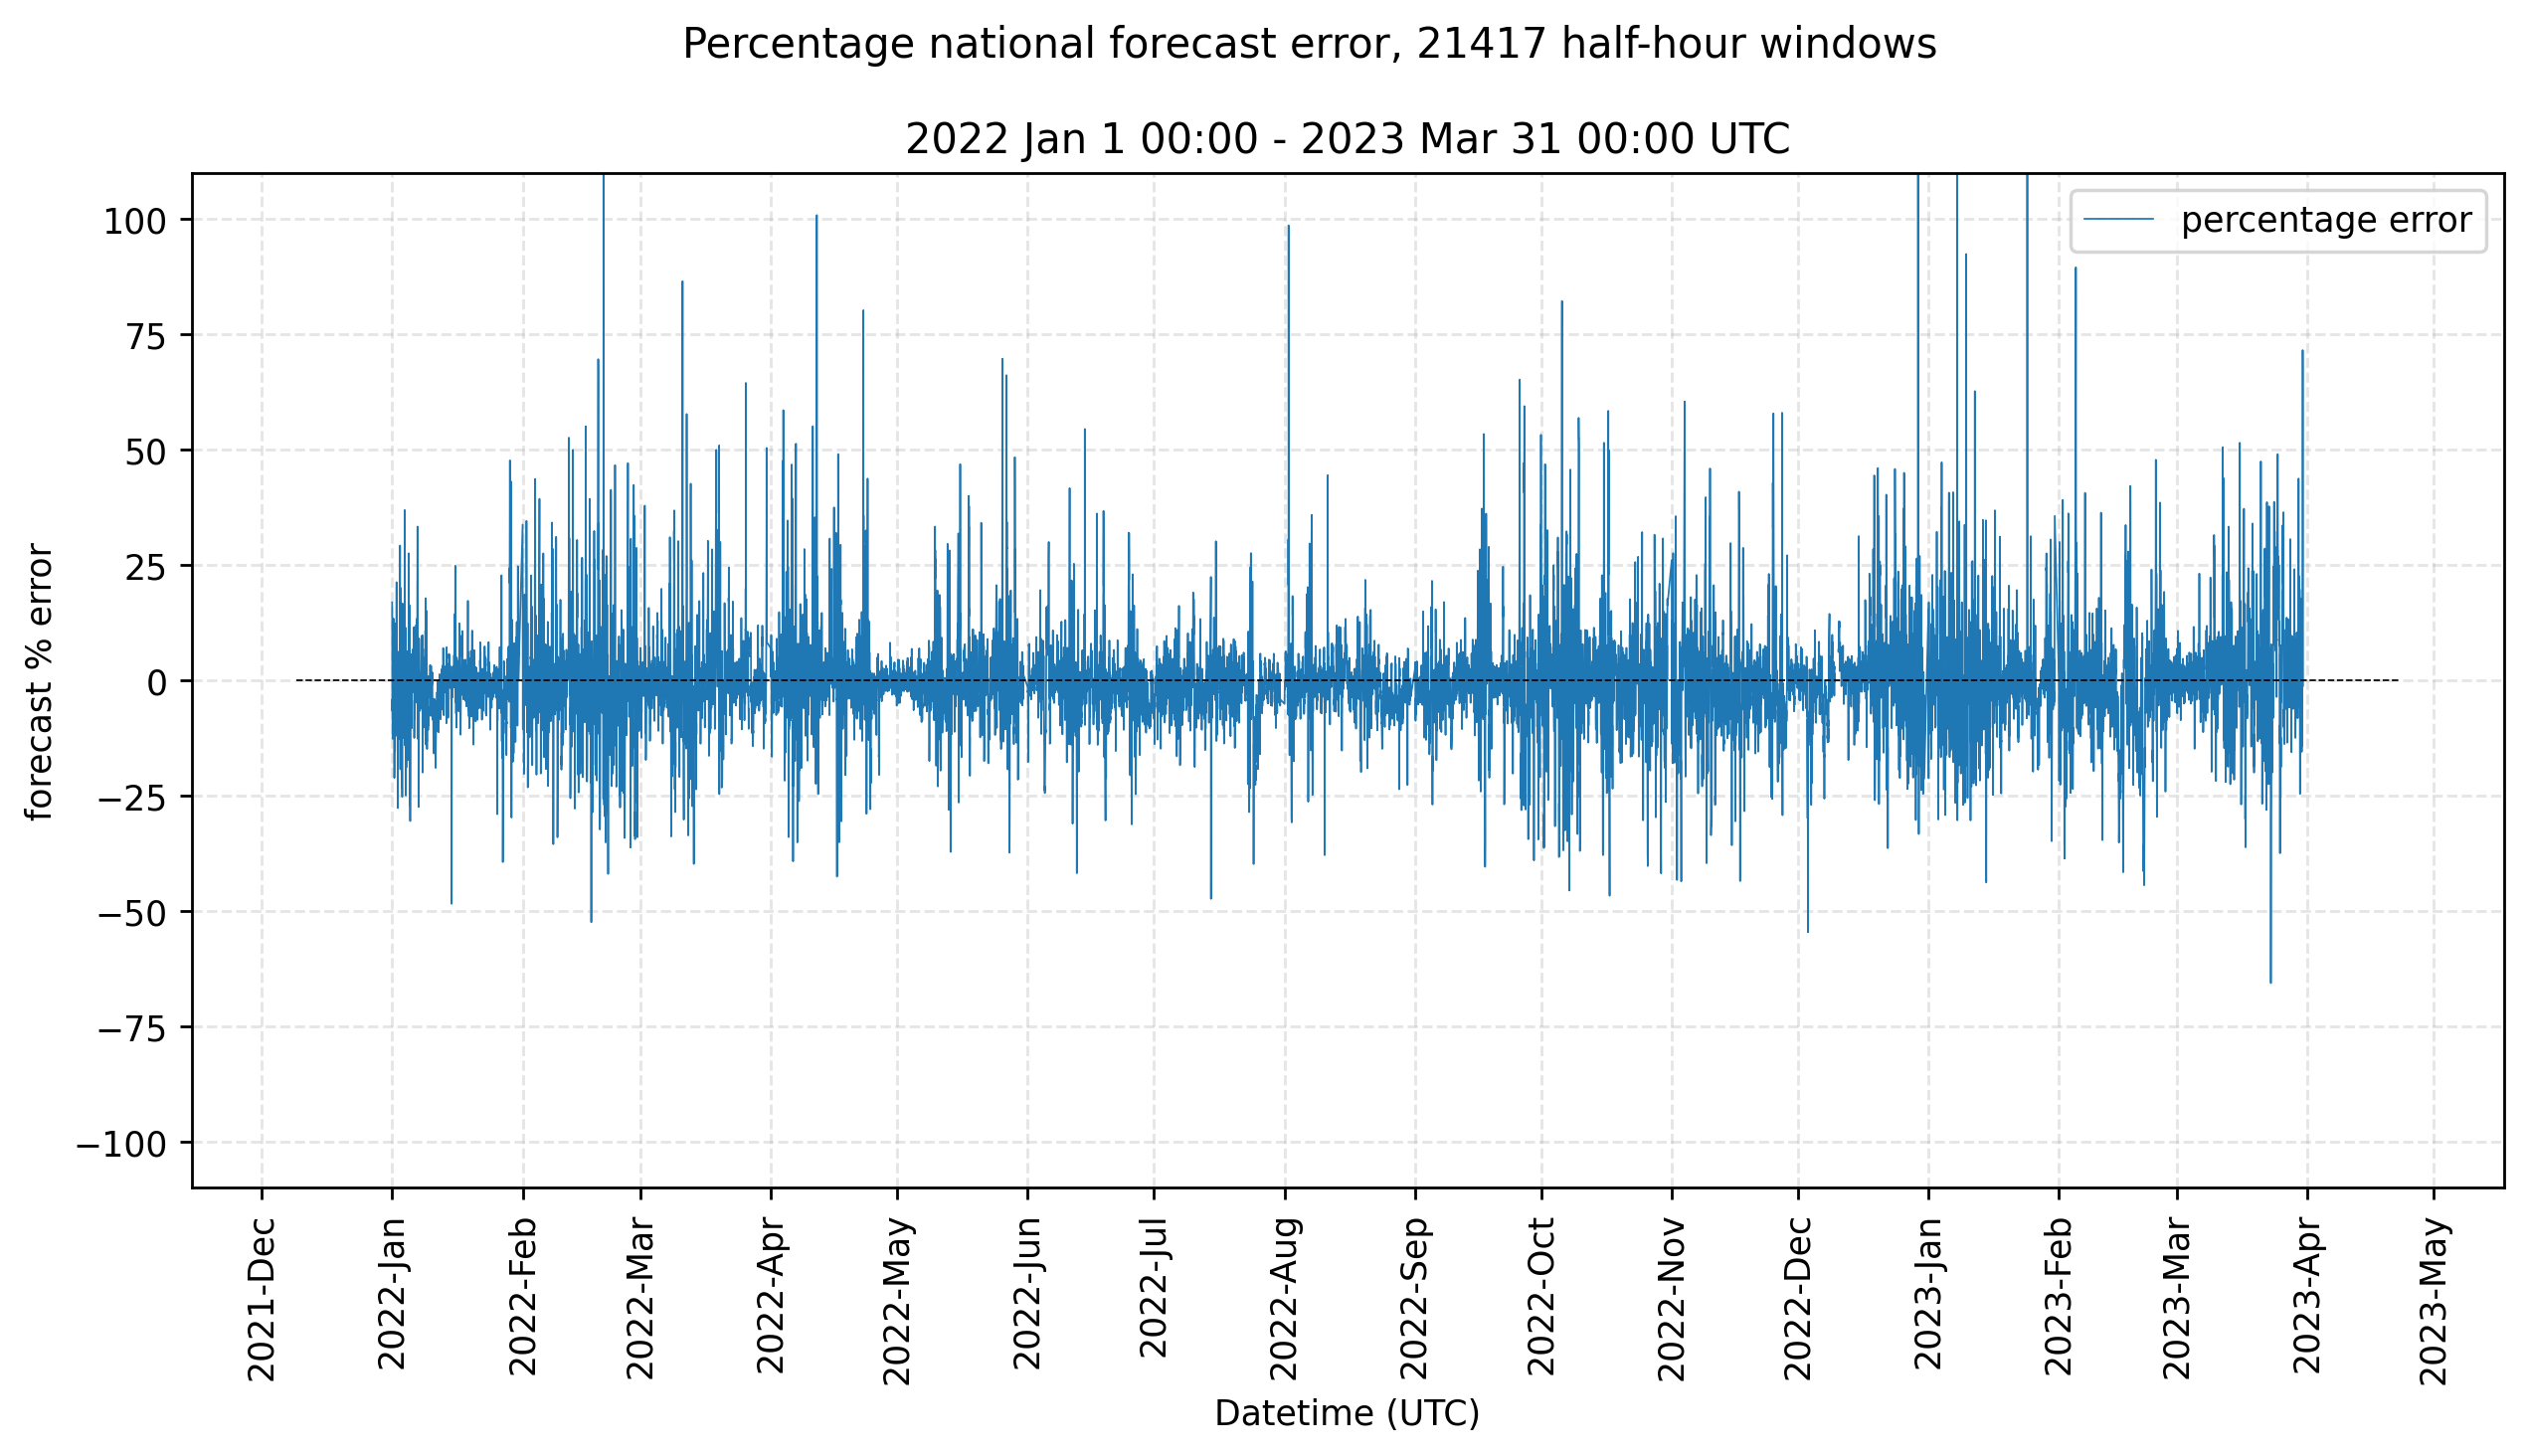

In [3]:
ax = df.plot(use_index=True, y="percentage error", linewidth=0.5)

ax.set_ylim(-110,110)
ax.set_title(f"{_ftime(df.index[0])} - {_ftime(df.index[-1])} UTC")
ax.set_ylabel("forecast % error")
ax.grid("on", linestyle="--", alpha=0.33)
ax.hlines(
    0.0,
    ax.get_xlim()[0],
    ax.get_xlim()[-1],
    color="k",
    linestyle="--",
    linewidth=0.5,
)

xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

ax.set_xticks(xticks, xlabels, rotation=90, ha="center")

locator = mdates.MonthLocator(interval=1)  # every month
fmt = mdates.DateFormatter("%Y-%b")
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(fmt)

fig = plt.gcf()
fig.suptitle(f"Percentage national forecast error, {len(df.index)} half-hour windows")

In [4]:
# The average percentage error for the entire period
print(df["percentage error"].mean(), df["percentage error"].std())

-0.48436403101202374 10.992827635927553
